# F Preparation

## Function

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import importlib

# font_path = '/data/vscode/azkaram/azkaram/98_attributes/fonts/Poppins-Regular.ttf'
# font_path_bold = '/data/vscode/azkaram/azkaram/98_attributes/fonts/Poppins-Bold.ttf'

font_path = '/Users/azkaram/Documents/01_Development/05_python/02_data_vis_library/fonts/Poppins-Regular.ttf'
font_path_bold = '/Users/azkaram/Documents/01_Development/05_python/02_data_vis_library/fonts/Poppins-Bold.ttf'

custom_font = fm.FontProperties(fname=font_path).get_name()
custom_font_bold = fm.FontProperties(fname=font_path_bold).get_name()
fm.fontManager.addfont(font_path)
fm.fontManager.addfont(font_path_bold)

custom_colors = ['#0472f7', '#06b45e', '#fc3d51', '#66d2ff', '#dab236', '#c1a2c2']
blue, green, red, sky, yellow, purple = custom_colors

import matplotlib as mpl

# Define themes
themes = {
    "dark": {
        "background": "#282c34",
        "edge": "#444444",
        "text": "#BBBBBB",
        "grid": "#444444"
    },
    "light": {
        "background": "#FFFFFF",
        "edge": "#CCCCCC",
        "text": "#686868",
        "grid": "#DDDDDD"
    }
}

def set_theme(name="dark", custom_font="DejaVu Sans", custom_colors=None, bar_edge=False):
    """
    Switch between light and dark Matplotlib themes.
    
    Parameters
    ----------
    name : str
        "dark" or "light"
    custom_font : str
        Font family to use
    custom_colors : list
        Custom color cycle (hex codes or matplotlib colors)
    bar_edge : bool or str
        - False: no edge color on bars
        - True: use default edge
        - str: hex color or named color for bar edges
    """
    if name not in themes:
        raise ValueError(f"Theme '{name}' not found. Choose from {list(themes.keys())}")

    theme = themes[name]

    # default edgecolor setting
    if bar_edge is False:
        patch_edge = "none"   # no edge
    elif bar_edge is True:
        patch_edge = theme["edge"]  # use theme edge
    else:
        patch_edge = bar_edge  # user-specified color

    mpl.rcParams.update({
        'axes.facecolor': theme["background"],
        'axes.edgecolor': theme["edge"],
        'axes.labelcolor': theme["text"],
        'figure.facecolor': theme["background"],
        'figure.edgecolor': theme["edge"],
        'savefig.facecolor': theme["background"],
        'savefig.edgecolor': theme["edge"],
        'xtick.color': theme["text"],
        'ytick.color': theme["text"],
        'grid.color': theme["grid"],
        'text.color': theme["text"],
        'axes.grid': True,
        'axes.spines.top': True,
        'axes.spines.right': True,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'grid.linestyle': '--',
        'grid.alpha': 0.8,
        'lines.linewidth': 2,
        'font.size': 12,
        'font.family': custom_font,
        'axes.prop_cycle': mpl.cycler(color=custom_colors if custom_colors else plt.rcParams['axes.prop_cycle'].by_key()['color']),
        'patch.edgecolor': patch_edge,
        'patch.linewidth': 0.8 if bar_edge else 0  # line width 0 if no edge
    })

set_theme('dark', custom_font=custom_font, custom_colors=custom_colors)

In [3]:
def best_format(value):
    try:
        num = float(value)
    except (TypeError, ValueError):
        return value  # non-numeric → pass through unchanged

    # ── 2️⃣  Pretty-print the numeric value ─────────────────────────────────────
    if abs(num) >= 1_000_000_000:
        return f"{num / 1_000_000_000:.1f} Bn"
    elif abs(num) >= 1_000_000:
        return f"{num / 1_000_000:.1f} Mn"
    elif abs(num) >= 1_000:
        return f"{num / 1_000:.1f} K"
    else:
        return f"{num:.1f}"

def best_fmt(value, tick_number):
    if abs(value) >= 1_000_000_000:
        return f'{value/1_000_000_000:.1f} Bn'
    elif abs(value) >= 1_000_000:
        return f'{value/1_000_000:.1f} Mn'
    elif abs(value) >= 1_000:
        return f'{value/1_000:.1f} K'
    else:
        return f'{value:.0f}'


def show(df):
    tmp = df.copy()
    for col in tmp.columns:
        tmp[col] = tmp[col].apply(best_format)
    return tmp

In [4]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def register_cmap_compat(colors, name, *, continuous=False, N=256):
    """
    Register a custom colormap in a version-safe way.

    Parameters
    ----------
    colors       : list-like of colour strings (hex / CSS / rgb tuples)
    name         : str, the public registry name
    continuous   : bool, if True build a gradient with LinearSegmentedColormap
    N            : int, number of samples for the gradient (ignored if discrete)
    """

    # ----- pick the right mpl class ----------------------------------------
    if continuous:
        cmap = LinearSegmentedColormap.from_list(name, colors, N=N)
    else:
        cmap = ListedColormap(colors, name=name)

    # ----- unregister if name already taken --------------------------------
    creg = mpl.colormaps          # new registry (3.8+)
    if name in creg:
        ans = input(f"Colormap '{name}' exists – overwrite? (Y/N) ")
        if ans.strip().upper() != "Y":
            print("Cancelled.")
            return
        creg.unregister(name)     # remove old entry first  [oai_citation:6‡Matplotlib](https://matplotlib.org/stable/api/prev_api_changes/api_changes_3.6.0.html?utm_source=chatgpt.com)

    # ----- register --------------------------------------------------------
    creg.register(cmap)           # works for all 3.8+; falls back below

    # legacy <3.8 fallback
    if not hasattr(mpl.colormaps, "register"):
        import matplotlib.cm as cm
        cm.register_cmap(name=name, cmap=cmap)      # alias still alive  [oai_citation:7‡Matplotlib](https://matplotlib.org/stable/api/prev_api_changes/api_changes_3.7.0.html?utm_source=chatgpt.com)

    print(f"✓ Registered '{name}' ({'gradient' if continuous else 'listed'})")

    # ----- quick preview ---------------------------------------------------
    fig, ax = plt.subplots(figsize=(4, .6))
    gradient = np.linspace(0, 1, N).reshape(1, -1)
    ax.imshow(gradient, aspect='auto', cmap=name)
    ax.set_axis_off()
    plt.show()

# --- palettes ---
my_colors_black = ["#0d1b2a","#1b263b","#415a77","#778da9","#e0e1dd"][::-1]
my_colors_blue  = ["#03045e","#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4","#90e0ef","#ade8f4","#caf0f8"]
my_colors_red   = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]

# --- minimal compat helper ---
def register_cmap_compat(colors, name, continuous=True):
    cmap = (LinearSegmentedColormap.from_list(name, colors)
            if continuous else ListedColormap(colors, name=name))
    try:
        mpl.colormaps.register(cmap)
    except ValueError:
        # already registered – fetch existing
        cmap = mpl.colormaps[name]
    return cmap

# register
register_cmap_compat(my_colors_black, 'cust_black_grad', continuous=True)
register_cmap_compat(my_colors_blue,  'cust_blue_grad',  continuous=True)
register_cmap_compat(my_colors_red,   'cust_red_grad',   continuous=False)

# === OPTION A: sample N colors from the cmap (no labels_sorted needed) ===
N = 10  # set this to however many colors you need
cmap = plt.get_cmap('cust_red_grad', N)
colors = [mpl.colors.to_hex(cmap(i)) for i in range(N)]  # i already normalized for ListedColormap

# === OPTION B: if you just want the raw list (discrete) ===
# colors = my_colors_red[:N]

# Data Preparation

In [110]:

df = pd.read_csv('flatfile/movie.csv').reset_index(drop=True)
df['text'] = df['text'].str.lower()
df.head()



,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [111]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords once (safe to run; it will skip if already present)
nltk.download("stopwords", quiet=True)

# Build stopword set
stop_words = set(stopwords.words("english"))

def clean_text_excluding_stopwords(text, stop_words=stop_words):
    if text is None:
        return ""
    text = str(text).lower()

    # keep alphabetic words only
    tokens = re.findall(r"[a-z]+", text)

    # drop stopwords
    tokens = [t for t in tokens if t not in stop_words]

    return " ".join(tokens)

def remove_br_br(text):
    output = text.replace('br br', '')
    return output

# Apply to your dataframe
df["text_clean"] = df["text"].astype("string").fillna("").apply(clean_text_excluding_stopwords)
df["text_clean"] = df['text_clean'].apply(remove_br_br)
df.head()


,text,label,text_clean
0,i grew up (b. 1965) watching and loving the th...,0,grew b watching loving thunderbirds mates scho...
1,"when i put this movie in my dvd player, and sa...",0,put movie dvd player sat coke chips expectatio...
2,why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,even though i have great interest in biblical ...,0,even though great interest biblical movies bor...
4,im a die hard dads army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...


# WordCloud

In [286]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example feedbacks
feedbacks = df['text_clean'].unique().tolist()

# Combine all text into one string
text = " ".join(feedbacks)

# Create the word cloud
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color=themes['dark']['background'],
    colormap='cust_blue_grad'
).generate(text)

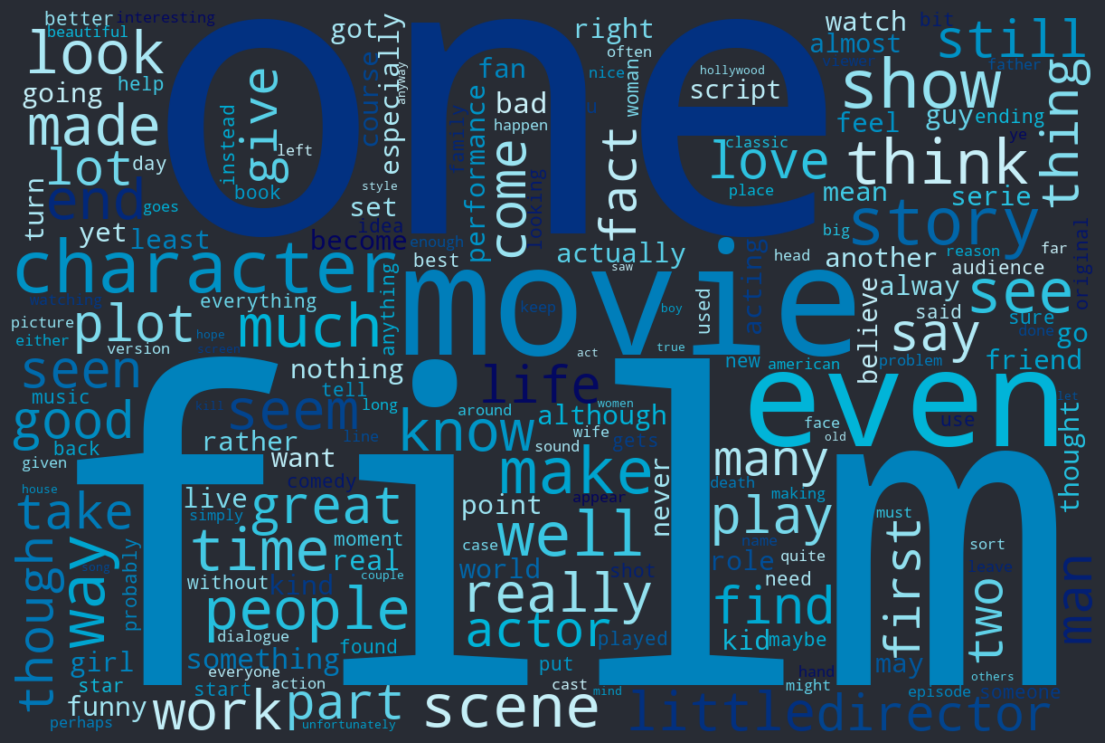

In [287]:

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('picts/01_wordcloud.png', dpi=3000)
plt.show()

## After Wordcloud

In [257]:
'movie' in dummy

False

In [261]:
dummy = [
    'bad movie movie',
    'good movie',
    'average movie'
]

import pandas as pd
from collections import Counter

def word_stats_to_df(text_list):
    # --- total_word: total occurrences across all feedback ---
    all_words = []
    for sentence in text_list:
        all_words.extend(str(sentence).lower().split())

    total_word = Counter(all_words)

    # --- total_feedback: number of feedbacks containing the word ---
    total_feedback = Counter()
    for sentence in text_list:
        unique_words = set(str(sentence).lower().split())
        total_feedback.update(unique_words)

    # --- build DataFrame ---
    df = pd.DataFrame({
        "word": total_word.keys(),
        "total_word": total_word.values(),
        "total_feedback": [total_feedback[w] for w in total_word.keys()]
    })

    return df.sort_values("total_word", ascending=False).reset_index(drop=True)

df_freq = word_stats_to_df(dummy)

,word,total_word,total_feedback
0,movie,4,3
1,bad,1,1
2,good,1,1
3,average,1,1


In [264]:
feedbacks = df['text_clean'].values.tolist()
freq = word_stats_to_df(feedbacks).sort_values('total_word', ascending=False)
freq.head(20)

,word,total_word,total_feedback
0,movie,70541,24465
1,film,63663,22205
2,one,42886,22721
3,like,32293,18569
4,good,23924,15226
5,time,20170,13910
6,even,19969,13428
7,would,19687,12977
8,really,18556,12091
9,story,18488,11886


In [266]:
freq.head(20)

,word,total_word,total_feedback
0,movie,70541,24465
1,film,63663,22205
2,one,42886,22721
3,like,32293,18569
4,good,23924,15226
5,time,20170,13910
6,even,19969,13428
7,would,19687,12977
8,really,18556,12091
9,story,18488,11886


In [283]:
freq.head(20).to_clipboard(sep='|', index=False)

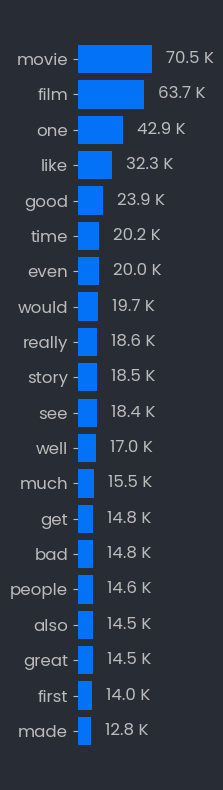

In [282]:

# ----------- DATA ------------------
data = freq.head(20)

categories = data['word'][::-1]
values = data['total_word'][::-1]

# ----------- VIZ ------------------
# Formatting Function
def best_format(value):
    if value >= (10**9):
        return f'{value/(10**9):.1f} Bn'
    if value >= (10**6):
        return f'{value/(10**6):.1f} Mn'
    if value >= (10**3):
        return f'{value/(10**3):.1f} K'
    else:
       return f'{value:.1f}'

# Create Figure
fig, ax = plt.subplots(figsize=(1,10))
bars = ax.barh(y=categories, width=values, 
               # color=custom_colors[:9] # For multi color
               # color=custom_colors[0] # For single color
               # height=0.8, left=0
               )
ax.bar_label(container=bars, labels=[best_format(v) for v in values], padding=10)

# Labeling
ax.set( 
    # xlim=(0,4), ylim=(0,20)
    # xticklabels=categories2,
    xticklabels=[],
    xticks=[]
    )
ax.set_axisbelow(True)
ax.set_frame_on(False)

# Customing Grid and Ticks
ax.grid(False)
# n = 4 
# custom_xticks = range(0, max(values)+n, n)
# ax.set_xticks(ticks=custom_xticks, labels=custom_xticks)

# Show Chart
plt.show()

## Filtering Based on the most occurance

In [61]:
mask = df['text_clean'].str.contains('good')
df[mask]

,text,label,text_clean
1,another in a long line of flicks made by peopl...,0,another long line flicks made people think kno...
7,what is night vision? well according to the st...,0,night vision well according star williamson le...
15,we actually watched this twice in the theater ...,0,actually watched twice theater could believe b...
17,"""big fat liar"" comes as a welcome -- shallow, ...",1,big fat liar comes welcome shallow welcome bre...
19,"the movie is really cool, i thought. it sticks...",1,movie really cool thought sticks original game...
...,...,...,...
194,i love this movie. is it on air anymore? what ...,1,love movie air anymore get air miss movie movi...
196,i had been subjected to this movie for a relat...,0,subjected movie relationship class school figu...
197,"i mean, really... either i suddenly lost my se...",0,mean really either suddenly lost sense humor r...
198,ruthless evil warlord samanosuke (superbly pla...,1,ruthless evil warlord samanosuke superbly play...


# Graph Analysis

In [104]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download once (only needed the first time)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

mask = df['text_clean'].str.contains('film')
feedbacks = df[mask]['text_clean'].values.tolist()

# --- Create Graph ---
G = nx.Graph()
word_counts = Counter()

for feedback in feedbacks:
    # --- Clean, tokenize, and lemmatize ---
    words = [
        lemmatizer.lemmatize(w.lower())
        for w in feedback.split()
        if w.lower() not in stop_words and w.isalpha()
    ]
    if not words:
        continue  # skip empty or stopword-only lines

    word_counts.update(words)

    # --- Add nodes (even for single words) ---
    for w in words:
        if w not in G:
            G.add_node(w)

    # --- Add edges for word co-occurrence (same feedback) ---
    if len(words) > 1:
        for w1, w2 in combinations(set(words), 2):
            if G.has_edge(w1, w2):
                G[w1][w2]['weight'] += 1
            else:
                G.add_edge(w1, w2, weight=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/azkaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/azkaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [133]:
import re
import networkx as nx

def tokenize(text: str):
    # simple tokenizer: lowercase, keep words, drop punctuation
    return re.findall(r"[a-z]+", text.lower())

def add_edges_inverse_distance(G, words, window=10):
    """
    Add co-occurrence edges within a sliding window.
    Weight added for a pair (i, j) is 1 / (j - i).
    Closer words => bigger weight.
    """
    n = len(words)
    if n <= 1:
        return

    for i in range(n):
        for j in range(i + 1, min(i + window + 1, n)):
            w1, w2 = words[i], words[j]
            if w1 == w2:
                continue

            d = j - i
            w = 1.0 / d

            if G.has_edge(w1, w2):
                G[w1][w2]["weight"] += w
            else:
                G.add_edge(w1, w2, weight=w)

def edge_weight(G, a, b):
    if G.has_edge(a, b):
        return G[a][b].get("weight", 0.0)
    if G.has_edge(b, a):  # in case you later switch to DiGraph or mix ordering
        return G[b][a].get("weight", 0.0)
    return 0.0

## Sentence Weighted

In [129]:
# ------------- Initialize Tools --------------------
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download once (only needed the first time)
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/azkaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/azkaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Confirming Method

In [168]:
# --------- Choosing Data ---------------------

feedbacks = [
    'good movie',
    'the movie was good however the actresses were so bad',
]

# --------- Weights Important Corelation ---------------------

def add_edges_inverse_distance(G, words, window=5):
    """
    Adds undirected edges for pairs within `window` tokens.
    Weight added = 1 / distance (distance = j - i).
    """
    n = len(words)
    if n <= 1:
        return

    for i in range(n):
        # look ahead up to `window` tokens
        for j in range(i + 1, min(i + window + 1, n)):
            w1, w2 = words[i], words[j]
            if w1 == w2:
                continue

            d = j - i
            w = 1.0 / d  # inverse distance

            if G.has_edge(w1, w2):
                G[w1][w2]["weight"] += w
            else:
                G.add_edge(w1, w2, weight=w)

# --- Create Graph ---
G = nx.Graph()
word_counts = Counter()


# ----- Adding Edges --------------
WINDOW = 2
for feedback in feedbacks:
    # --- Clean, tokenize, and lemmatize ---
    words = [
        lemmatizer.lemmatize(w.lower())
        for w in feedback.split()
        if w.lower() not in stop_words and w.isalpha()
    ]
    if not words:
        continue

    word_counts.update(words)
    G.add_nodes_from(words) # --- Add nodes (even for single words) ---
    add_edges_inverse_distance(G, words, window=WINDOW) # --- Add edges (distance-aware, windowed, inverse weighted) ---


In [169]:
nx.get_edge_attributes(G, 'weight')

{('good', 'movie'): 2.0,
 ('good', 'however'): 1.0,
 ('good', 'actress'): 0.5,
 ('movie', 'however'): 0.5,
 ('however', 'actress'): 1.0,
 ('however', 'bad'): 0.5,
 ('actress', 'bad'): 1.0}

### Good Feedback

In [170]:
# --------- Choosing Data ---------------------

mask = df['text_clean'].str.contains('good')
feedbacks = df[mask]['text_clean'].values.tolist()

# --------- Weights Important Corelation ---------------------

def add_edges_inverse_distance(G, words, window=5):
    """
    Adds undirected edges for pairs within `window` tokens.
    Weight added = 1 / distance (distance = j - i).
    """
    n = len(words)
    if n <= 1:
        return

    for i in range(n):
        # look ahead up to `window` tokens
        for j in range(i + 1, min(i + window + 1, n)):
            w1, w2 = words[i], words[j]
            if w1 == w2:
                continue

            d = j - i
            w = 1.0 / d  # inverse distance

            if G.has_edge(w1, w2):
                G[w1][w2]["weight"] += w
            else:
                G.add_edge(w1, w2, weight=w)

# --- Create Graph ---
G = nx.Graph()
word_counts = Counter()


# ----- Adding Edges --------------
WINDOW = 2
for feedback in feedbacks:
    # --- Clean, tokenize, and lemmatize ---
    words = [
        lemmatizer.lemmatize(w.lower())
        for w in feedback.split()
        if w.lower() not in stop_words and w.isalpha()
    ]
    if not words:
        continue

    word_counts.update(words)
    G.add_nodes_from(words) # --- Add nodes (even for single words) ---
    add_edges_inverse_distance(G, words, window=WINDOW) # --- Add edges (distance-aware, windowed, inverse weighted) ---


Before: 58383 nodes, 2222411 edges
After : 93 nodes, 198 edges


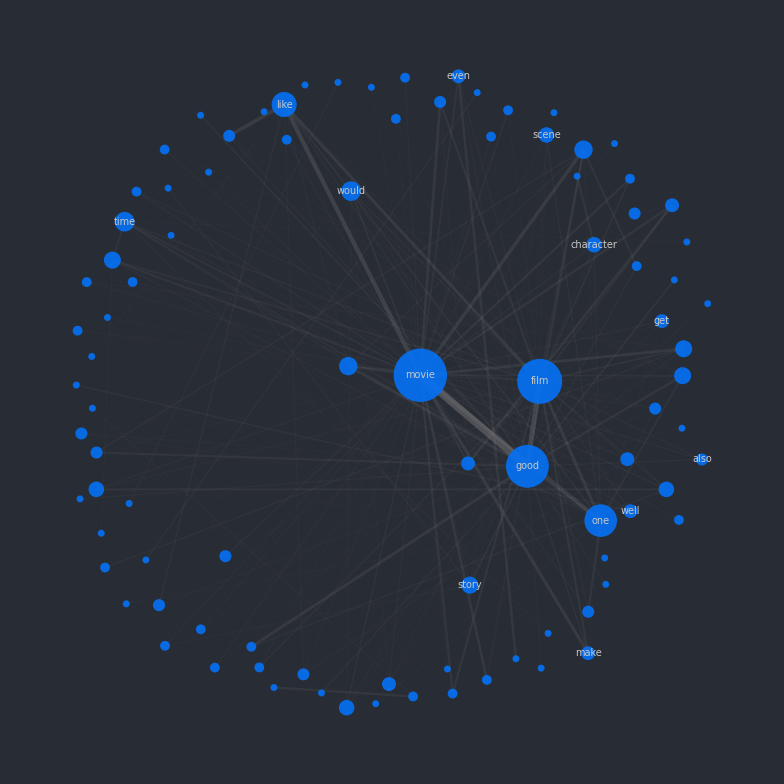

In [212]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph_top_degree(
    G,
    top_n=300,              # keep top-N nodes by degree
    min_edge_weight=0.4,    # drop weak edges
    layout="spring",        # "spring" or "kamada"
    seed=42,
    iterations=25,
    label_top_n=120,        # label only top-N by degree
    figsize=(15, 8),
):
    # ---------- 1) FILTER BY DEGREE ----------
    # Sort nodes by degree (descending)
    degree_sorted = sorted(G.degree(), key=lambda x: x[1], reverse=True)

    keep_nodes = {n for n, _ in degree_sorted[:top_n]}
    H = G.subgraph(keep_nodes).copy()

    # ---------- 2) PRUNE WEAK EDGES ----------
    weak_edges = [
        (u, v) for u, v, d in H.edges(data=True)
        if d.get("weight", 0.0) < min_edge_weight
    ]
    H.remove_edges_from(weak_edges)

    # Remove isolated nodes
    H.remove_nodes_from(list(nx.isolates(H)))

    print("Before:", G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")
    print("After :", H.number_of_nodes(), "nodes,", H.number_of_edges(), "edges")

    if H.number_of_nodes() == 0:
        print("Nothing to draw. Try increasing top_n or lowering min_edge_weight.")
        return

    # ---------- 3) LAYOUT ----------
    if layout == "kamada":
        pos = nx.kamada_kawai_layout(H)
    else:
        pos = nx.spring_layout(H, 
                               seed=120, 
                               weight="weight",
                               k=10,  
                               iterations=30)

    # ---------- 4) NODE STYLING ----------
    nodes = list(H.nodes())
    degrees = dict(H.degree())

    node_sizes = [max(20, degrees[n] * 25) for n in nodes]
    node_colors = ['#0472f7' if degrees[n] > 0 else '#ADB5BD' for n in nodes]

    # ---------- 5) EDGE STYLING (BULK) ----------
    edges = list(H.edges(data=True))
    if edges:
        weights = np.array([d.get("weight", 1.0) for (_, _, d) in edges])
        max_w = weights.max() if len(weights) else 1.0
        ratios = weights / max_w

        edge_widths = 0.1 + ratios * 5.4
        edge_alphas = 0.001 + ratios * 0.45

    # ---------- 6) DRAW ----------
    plt.figure(figsize=figsize)

    if edges:
        lc = nx.draw_networkx_edges(
            H, pos,
            edgelist=[(u, v) for (u, v, _) in edges],
            width=edge_widths,
            edge_color="gray"
        )
        lc.set_alpha(edge_alphas)

    nx.draw_networkx_nodes(
        H, pos,
        nodelist=nodes,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.9
    )

    # ---------- 7) LABEL TOP-N BY DEGREE ----------
    label_nodes = {n for n, _ in degree_sorted[:label_top_n] if n in H}
    labels = {n: n for n in label_nodes}

    nx.draw_networkx_labels(
        H, pos,
        labels=labels,
        font_size=7,
        font_color="#C8C8C8"
    )

    plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_graph_top_degree(
    G,
    top_n=200,
    min_edge_weight=250,
    label_top_n=15,
    seed=200,
    figsize=(8,8)
)

### Bad Feedback

In [144]:
# --------- Choosing Data ---------------------

mask = df['text_clean'].str.contains('bad')
feedbacks = df[mask]['text_clean'].values.tolist()

# --------- Weights Important Corelation ---------------------

def add_edges_inverse_distance(G, words, window=5):
    """
    Adds undirected edges for pairs within `window` tokens.
    Weight added = 1 / distance (distance = j - i).
    """
    n = len(words)
    if n <= 1:
        return

    for i in range(n):
        # look ahead up to `window` tokens
        for j in range(i + 1, min(i + window + 1, n)):
            w1, w2 = words[i], words[j]
            if w1 == w2:
                continue

            d = j - i
            w = 1.0 / d  # inverse distance

            if G.has_edge(w1, w2):
                G[w1][w2]["weight"] += w
            else:
                G.add_edge(w1, w2, weight=w)

# --- Create Graph ---
G = nx.Graph()
word_counts = Counter()


# ----- Adding Edges --------------
WINDOW = 2
for feedback in feedbacks:
    # --- Clean, tokenize, and lemmatize ---
    words = [
        lemmatizer.lemmatize(w.lower())
        for w in feedback.split()
        if w.lower() not in stop_words and w.isalpha()
    ]
    if not words:
        continue

    word_counts.update(words)
    G.add_nodes_from(words) # --- Add nodes (even for single words) ---
    add_edges_inverse_distance(G, words, window=WINDOW) # --- Add edges (distance-aware, windowed, inverse weighted) ---


Before: 47523 nodes, 1543157 edges
After : 39 nodes, 87 edges


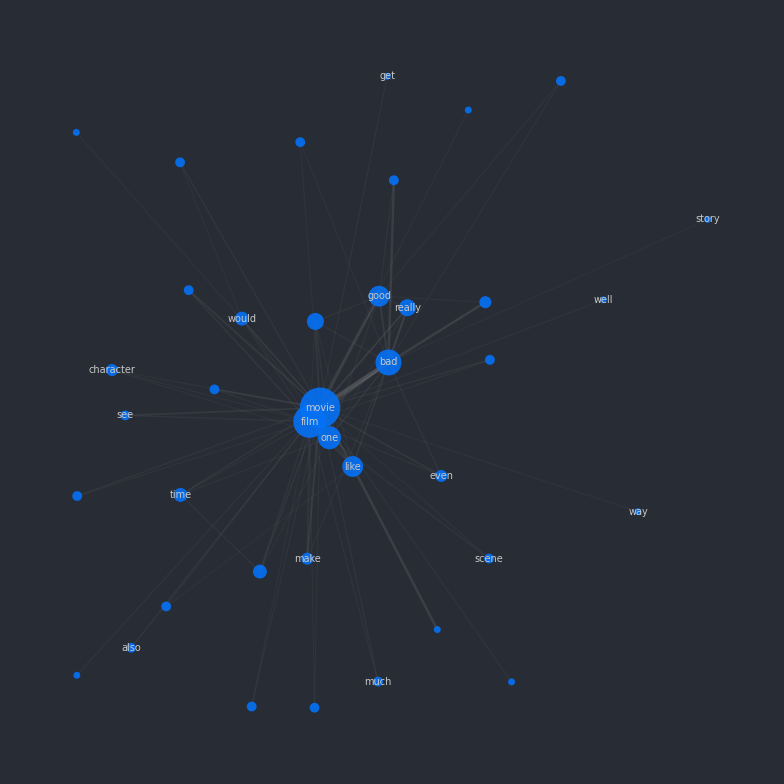

In [151]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph_top_degree(
    G,
    top_n=300,              # keep top-N nodes by degree
    min_edge_weight=0.4,    # drop weak edges
    layout="spring",        # "spring" or "kamada"
    seed=42,
    iterations=25,
    label_top_n=120,        # label only top-N by degree
    figsize=(15, 8),
):
    # ---------- 1) FILTER BY DEGREE ----------
    # Sort nodes by degree (descending)
    degree_sorted = sorted(G.degree(), key=lambda x: x[1], reverse=True)

    keep_nodes = {n for n, _ in degree_sorted[:top_n]}
    H = G.subgraph(keep_nodes).copy()

    # ---------- 2) PRUNE WEAK EDGES ----------
    weak_edges = [
        (u, v) for u, v, d in H.edges(data=True)
        if d.get("weight", 0.0) < min_edge_weight
    ]
    H.remove_edges_from(weak_edges)

    # Remove isolated nodes
    H.remove_nodes_from(list(nx.isolates(H)))

    print("Before:", G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")
    print("After :", H.number_of_nodes(), "nodes,", H.number_of_edges(), "edges")

    if H.number_of_nodes() == 0:
        print("Nothing to draw. Try increasing top_n or lowering min_edge_weight.")
        return

    # ---------- 3) LAYOUT ----------
    if layout == "kamada":
        pos = nx.kamada_kawai_layout(H)
    else:
        pos = nx.spring_layout(H, seed=seed, iterations=iterations)

    # ---------- 4) NODE STYLING ----------
    nodes = list(H.nodes())
    degrees = dict(H.degree())

    node_sizes = [max(20, degrees[n] * 25) for n in nodes]
    node_colors = ['#0472f7' if degrees[n] > 0 else '#ADB5BD' for n in nodes]

    # ---------- 5) EDGE STYLING (BULK) ----------
    edges = list(H.edges(data=True))
    if edges:
        weights = np.array([d.get("weight", 1.0) for (_, _, d) in edges])
        max_w = weights.max() if len(weights) else 1.0
        ratios = weights / max_w

        edge_widths = 0.6 + ratios * 2.4
        edge_alphas = 0.05 + ratios * 0.35

    # ---------- 6) DRAW ----------
    plt.figure(figsize=figsize)

    if edges:
        lc = nx.draw_networkx_edges(
            H, pos,
            edgelist=[(u, v) for (u, v, _) in edges],
            width=edge_widths,
            edge_color="gray"
        )
        lc.set_alpha(edge_alphas)

    nx.draw_networkx_nodes(
        H, pos,
        nodelist=nodes,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.9
    )

    # ---------- 7) LABEL TOP-N BY DEGREE ----------
    label_nodes = {n for n, _ in degree_sorted[:label_top_n] if n in H}
    labels = {n: n for n in label_nodes}

    nx.draw_networkx_labels(
        H, pos,
        labels=labels,
        font_size=7,
        font_color="#C8C8C8"
    )

    plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_graph_top_degree(
    G,
    top_n=50,
    min_edge_weight=220,
    label_top_n=20,
    seed=100,
    figsize=(8,8)
)

### Bad and Good Feedback

In [216]:

mask1 = df['text_clean'].str.contains(r'bad.*good', regex=True, na=False)
mask2 = df['text_clean'].str.contains(r'bad.*good', regex=True, na=False)
mask = (mask1 | mask2)
feedbacks = df[mask]['text_clean'].values.tolist()

In [288]:

# --------- Choosing Data ---------------------

mask1 = df['text_clean'].str.contains(r'bad.*good', regex=True, na=False)
mask2 = df['text_clean'].str.contains(r'bad.*good', regex=True, na=False)
mask = (mask1 | mask2)
feedbacks = df[mask]['text_clean'].values.tolist()

# --------- Weights Important Corelation ---------------------

def add_edges_inverse_distance(G, words, window=5):
    """
    Adds undirected edges for pairs within `window` tokens.
    Weight added = 1 / distance (distance = j - i).
    """
    n = len(words)
    if n <= 1:
        return

    for i in range(n):
        # look ahead up to `window` tokens
        for j in range(i + 1, min(i + window + 1, n)):
            w1, w2 = words[i], words[j]
            if w1 == w2:
                continue

            d = j - i
            w = 1.0 / d  # inverse distance

            if G.has_edge(w1, w2):
                G[w1][w2]["weight"] += w
            else:
                G.add_edge(w1, w2, weight=w)

# --- Create Graph ---
G = nx.Graph()
word_counts = Counter()


# ----- Adding Edges --------------
WINDOW = 2
for feedback in feedbacks:
    # --- Clean, tokenize, and lemmatize ---
    words = [
        lemmatizer.lemmatize(w.lower())
        for w in feedback.split()
        if w.lower() not in stop_words and w.isalpha()
    ]
    if not words:
        continue

    word_counts.update(words)
    G.add_nodes_from(words) # --- Add nodes (even for single words) ---
    add_edges_inverse_distance(G, words, window=WINDOW) # --- Add edges (distance-aware, windowed, inverse weighted) ---


Before: 31824 nodes, 729726 edges
After : 39 nodes, 97 edges


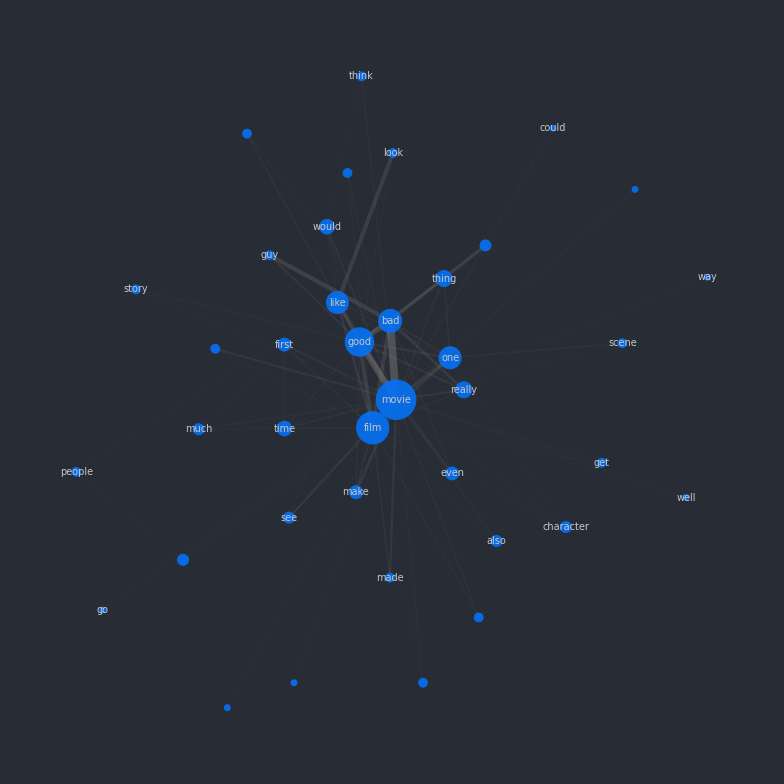

In [289]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph_top_degree(
    G,
    top_n=300,              # keep top-N nodes by degree
    min_edge_weight=0.4,    # drop weak edges
    layout="spring",        # "spring" or "kamada"
    seed=42,
    iterations=25,
    label_top_n=120,        # label only top-N by degree
    figsize=(15, 8),
):
    # ---------- 1) FILTER BY DEGREE ----------
    # Sort nodes by degree (descending)
    degree_sorted = sorted(G.degree(), key=lambda x: x[1], reverse=True)

    keep_nodes = {n for n, _ in degree_sorted[:top_n]}
    H = G.subgraph(keep_nodes).copy()

    # ---------- 2) PRUNE WEAK EDGES ----------
    weak_edges = [
        (u, v) for u, v, d in H.edges(data=True)
        if d.get("weight", 0.0) < min_edge_weight
    ]
    H.remove_edges_from(weak_edges)

    # Remove isolated nodes
    H.remove_nodes_from(list(nx.isolates(H)))

    print("Before:", G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")
    print("After :", H.number_of_nodes(), "nodes,", H.number_of_edges(), "edges")

    if H.number_of_nodes() == 0:
        print("Nothing to draw. Try increasing top_n or lowering min_edge_weight.")
        return

    # ---------- 3) LAYOUT ----------
    if layout == "kamada":
        pos = nx.kamada_kawai_layout(H)
    else:
        pos = nx.spring_layout(H, 
                               seed=120, 
                               weight="weight",
                               k=3,  
                               iterations=30)

    # ---------- 4) NODE STYLING ----------
    nodes = list(H.nodes())
    degrees = dict(H.degree())

    node_sizes = [max(20, degrees[n] * 25) for n in nodes]
    node_colors = ['#0472f7' if degrees[n] > 0 else '#ADB5BD' for n in nodes]

    # ---------- 5) EDGE STYLING (BULK) ----------
    edges = list(H.edges(data=True))
    if edges:
        weights = np.array([d.get("weight", 1.0) for (_, _, d) in edges])
        max_w = weights.max() if len(weights) else 1.0
        ratios = weights / max_w

        edge_widths = 0.1 + ratios * 5.4
        edge_alphas = 0.001 + ratios * 0.45

    # ---------- 6) DRAW ----------
    plt.figure(figsize=figsize)

    if edges:
        lc = nx.draw_networkx_edges(
            H, pos,
            edgelist=[(u, v) for (u, v, _) in edges],
            width=edge_widths,
            edge_color="gray"
        )
        lc.set_alpha(edge_alphas)

    nx.draw_networkx_nodes(
        H, pos,
        nodelist=nodes,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.9
    )

    # ---------- 7) LABEL TOP-N BY DEGREE ----------
    label_nodes = {n for n, _ in degree_sorted[:label_top_n] if n in H}
    labels = {n: n for n in label_nodes}

    nx.draw_networkx_labels(
        H, pos,
        labels=labels,
        font_size=7,
        font_color="#C8C8C8"
    )

    plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_graph_top_degree(
    G,
    top_n=50,
    min_edge_weight=90,
    label_top_n=30,
    seed=200,
    figsize=(8,8)
)

In [302]:

edge_attr = nx.get_edge_attributes(G, 'weight')
df_edges = pd.DataFrame(
    [(u, v, w) for (u, v), w in edge_attr.items()],
    columns=['node_from', 'node_to', 'weight']
)

df_edges = df_edges.sort_values('weight', ascending=False).reset_index(drop=True)
df_edges.head(10)

,node_from,node_to,weight
0,movie,bad,906.0
1,movie,good,755.0
2,good,bad,606.5
3,bad,guy,496.0
4,movie,like,485.5
5,good,film,459.0
6,like,look,457.0
7,bad,film,425.5
8,bad,acting,394.0
9,movie,one,383.5


In [296]:
mask1 = df_edges['node_from'] == 'movie'
mask2 = df_edges['node_to'] == 'good'
mask = (mask1 & mask2)
df_edges[mask]

,node_from,node_to,weight
1,movie,good,755.0


In [297]:
mask1 = df_edges['node_from'] == 'movie'
mask2 = df_edges['node_to'] == 'bad'
mask = (mask1 & mask2)
df_edges[mask]

,node_from,node_to,weight
0,movie,bad,906.0


In [299]:
mask = df_edges['node_from'] == 'bad'
df_edges[mask].sort_values('weight', ascending=False)

,node_from,node_to,weight
3,bad,guy,496.0
7,bad,film,425.5
8,bad,acting,394.0
11,bad,really,331.0
35,bad,one,207.0
...,...,...,...
569365,bad,helsing,0.5
569364,bad,eddie,0.5
569363,bad,hum,0.5
569362,bad,pursuing,0.5


In [300]:
mask = df_edges['node_from'] == 'good'
df_edges[mask].sort_values('weight', ascending=False)

,node_from,node_to,weight
2,good,bad,606.5
5,good,film,459.0
20,good,thing,264.0
21,good,one,260.0
22,good,pretty,251.5
...,...,...,...
590938,good,hook,0.5
590937,good,chap,0.5
590936,good,laughably,0.5
590935,good,stamp,0.5


In [301]:
mask = df_edges['node_from'] == 'movie'
df_edges[mask].sort_values('weight', ascending=False)

,node_from,node_to,weight
0,movie,bad,906.0
1,movie,good,755.0
4,movie,like,485.5
9,movie,one,383.5
12,movie,make,322.0
...,...,...,...
584745,movie,ridiculously,0.5
584744,movie,expand,0.5
584743,movie,bijo,0.5
584742,movie,crudely,0.5


#### Sampling Bad and Good Feedback

In [249]:
mask1 = df['text_clean'].str.contains(r'bad.*good', regex=True, na=False)
mask2 = df['text_clean'].str.contains(r'good.*bad', regex=True, na=False)
mask = (mask1 | mask2)
df[mask][['text']].to_csv('flatfile/spam.csv', sep='|', index=False)

# Analyzing Graph (Centrality)

# Actions